In [1]:
import pandas as pd
import numpy as np
import random
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

### Exploratory Data Analysis

In [2]:
df = pd.read_csv('Food_Delivery_Times.csv')
df

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68
...,...,...,...,...,...,...,...,...,...
995,107,8.50,Clear,High,Evening,Car,13,3.0,54
996,271,16.28,Rainy,Low,Morning,Scooter,8,9.0,71
997,861,15.62,Snowy,High,Evening,Scooter,26,2.0,81
998,436,14.17,Clear,Low,Afternoon,Bike,8,0.0,55


In [3]:
df.head()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                1000 non-null   int64  
 1   Distance_km             1000 non-null   float64
 2   Weather                 970 non-null    object 
 3   Traffic_Level           970 non-null    object 
 4   Time_of_Day             970 non-null    object 
 5   Vehicle_Type            1000 non-null   object 
 6   Preparation_Time_min    1000 non-null   int64  
 7   Courier_Experience_yrs  970 non-null    float64
 8   Delivery_Time_min       1000 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 70.4+ KB


In [5]:
df.isnull().sum()

Order_ID                   0
Distance_km                0
Weather                   30
Traffic_Level             30
Time_of_Day               30
Vehicle_Type               0
Preparation_Time_min       0
Courier_Experience_yrs    30
Delivery_Time_min          0
dtype: int64

In [6]:
df.nunique()

Order_ID                  1000
Distance_km                785
Weather                      5
Traffic_Level                3
Time_of_Day                  4
Vehicle_Type                 3
Preparation_Time_min        25
Courier_Experience_yrs      10
Delivery_Time_min          108
dtype: int64

In [7]:
df.shape

(1000, 9)

In [8]:
df = df.drop(columns=['Order_ID'])

In [9]:
df_filled_copy = df.fillna(df.mode().iloc[0])

In [10]:
df_filled = df.fillna(df.mode().iloc[0])

In [11]:
df_filled.isnull().sum()

Distance_km               0
Weather                   0
Traffic_Level             0
Time_of_Day               0
Vehicle_Type              0
Preparation_Time_min      0
Courier_Experience_yrs    0
Delivery_Time_min         0
dtype: int64

In [12]:
df_filled.nunique()

Distance_km               785
Weather                     5
Traffic_Level               3
Time_of_Day                 4
Vehicle_Type                3
Preparation_Time_min       25
Courier_Experience_yrs     10
Delivery_Time_min         108
dtype: int64

In [13]:
df_filled['Time_of_Day'].unique()

array(['Afternoon', 'Evening', 'Night', 'Morning'], dtype=object)

In [14]:
# Low medium High maintains an order so converted using Ordinal encoding
enc = OrdinalEncoder(categories = [['Low', 'Medium', 'High']])
df_filled['Traffic_Level'] = enc.fit_transform(df_filled[['Traffic_Level']])
df_filled.head()

,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,7.93,Windy,0.0,Afternoon,Scooter,12,1.0,43
1,16.42,Clear,1.0,Evening,Bike,20,2.0,84
2,9.52,Foggy,0.0,Night,Scooter,28,1.0,59
3,7.44,Rainy,1.0,Afternoon,Scooter,5,1.0,37
4,19.03,Clear,0.0,Morning,Bike,16,5.0,68


In [15]:
#One hot encoding

ohe = OneHotEncoder(handle_unknown = 'ignore',sparse_output = False).set_output(transform = 'pandas')
encoded_filled = ohe.fit_transform(df_filled[['Weather','Time_of_Day', 'Vehicle_Type']])
print(encoded_filled)
df_filled = pd.concat([df_filled,encoded_filled],axis = 1).drop(columns=['Weather','Time_of_Day','Vehicle_Type','Weather_Clear','Time_of_Day_Night','Vehicle_Type_Bike'])

     Weather_Clear  Weather_Foggy  Weather_Rainy  Weather_Snowy  \
0              0.0            0.0            0.0            0.0   
1              1.0            0.0            0.0            0.0   
2              0.0            1.0            0.0            0.0   
3              0.0            0.0            1.0            0.0   
4              1.0            0.0            0.0            0.0   
..             ...            ...            ...            ...   
995            1.0            0.0            0.0            0.0   
996            0.0            0.0            1.0            0.0   
997            0.0            0.0            0.0            1.0   
998            1.0            0.0            0.0            0.0   
999            0.0            1.0            0.0            0.0   

     Weather_Windy  Time_of_Day_Afternoon  Time_of_Day_Evening  \
0              1.0                    1.0                  0.0   
1              0.0                    0.0                  1.0 

In [24]:
#Ordinal encoding
enc = OrdinalEncoder(categories = [['Scooter', 'Bike', 'Car']])
df_filled['Vehicle_Type'] = enc.fit_transform(df_filled[['Vehicle_Type']])

enc = OrdinalEncoder(categories = [['Clear', 'Windy', 'Foggy','Rainy','Snowy']])
df_filled['Weather'] = enc.fit_transform(df_filled[['Weather']])

enc = OrdinalEncoder(categories = [['Night', 'Afternoon', 'Morning','Evening']])
df_filled['Time_of_Day'] = enc.fit_transform(df_filled[['Time_of_Day']])


df_filled.head()



,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,7.93,1.0,0.0,1.0,0.0,12,1.0,43
1,16.42,0.0,1.0,3.0,1.0,20,2.0,84
2,9.52,2.0,0.0,0.0,0.0,28,1.0,59
3,7.44,3.0,1.0,1.0,0.0,5,1.0,37
4,19.03,0.0,0.0,2.0,1.0,16,5.0,68


In [16]:
df_filled.shape

(1000, 14)

In [17]:
df_filled.isnull().sum()

Distance_km               0
Traffic_Level             0
Preparation_Time_min      0
Courier_Experience_yrs    0
Delivery_Time_min         0
Weather_Foggy             0
Weather_Rainy             0
Weather_Snowy             0
Weather_Windy             0
Time_of_Day_Afternoon     0
Time_of_Day_Evening       0
Time_of_Day_Morning       0
Vehicle_Type_Car          0
Vehicle_Type_Scooter      0
dtype: int64

In [18]:
df_filled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Distance_km             1000 non-null   float64
 1   Traffic_Level           1000 non-null   float64
 2   Preparation_Time_min    1000 non-null   int64  
 3   Courier_Experience_yrs  1000 non-null   float64
 4   Delivery_Time_min       1000 non-null   int64  
 5   Weather_Foggy           1000 non-null   float64
 6   Weather_Rainy           1000 non-null   float64
 7   Weather_Snowy           1000 non-null   float64
 8   Weather_Windy           1000 non-null   float64
 9   Time_of_Day_Afternoon   1000 non-null   float64
 10  Time_of_Day_Evening     1000 non-null   float64
 11  Time_of_Day_Morning     1000 non-null   float64
 12  Vehicle_Type_Car        1000 non-null   float64
 13  Vehicle_Type_Scooter    1000 non-null   float64
dtypes: float64(12), int64(2)
memory usage: 10

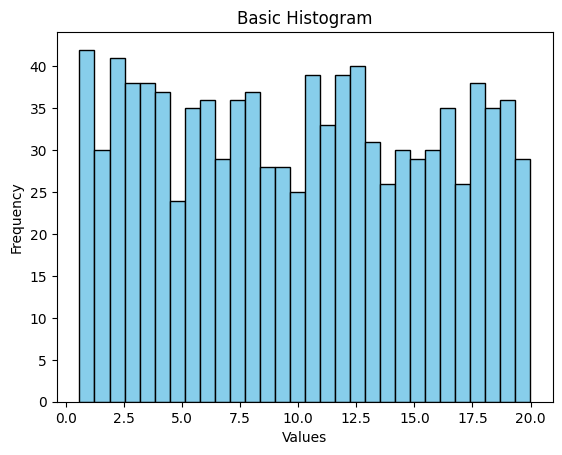

In [19]:
data = df_filled['Distance_km']
plt.hist(data, bins=30, color='skyblue', edgecolor='black')
 
# Adding labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Basic Histogram')
 
# Display the plot
plt.show()

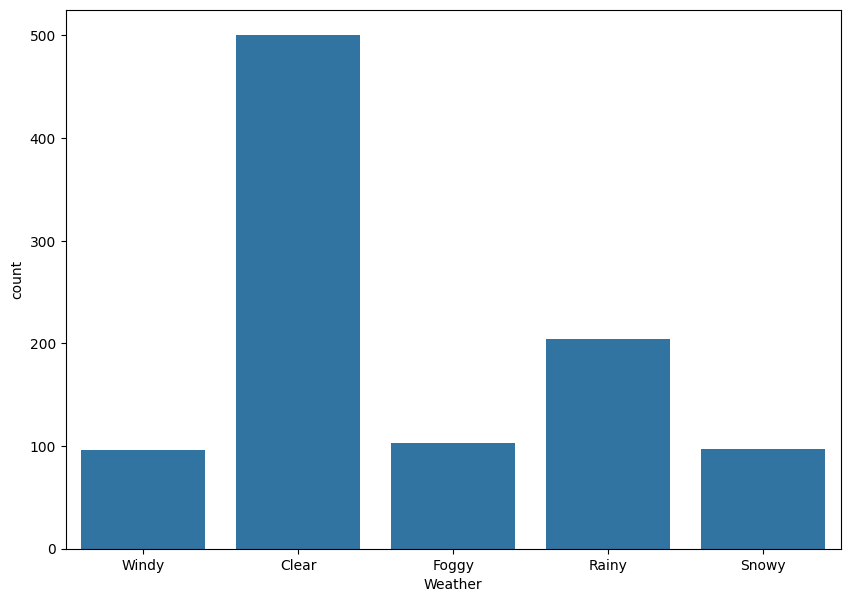

In [20]:
fig = plt.figure(figsize =(10, 7))

sns.countplot(x ='Weather', data = df_filled_copy)
 
# Show the plot
plt.show()

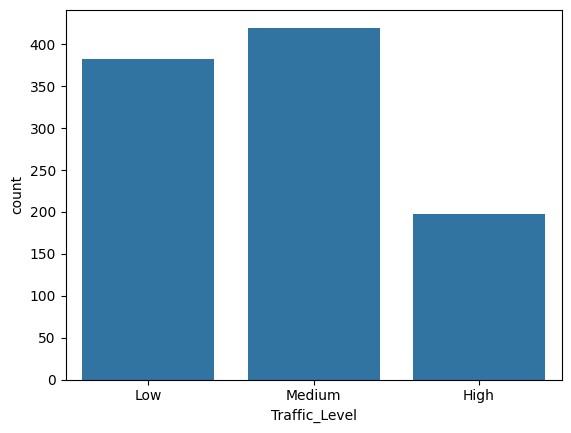

In [21]:
sns.countplot(x ='Traffic_Level', data = df_filled_copy)
 
# Show the plot
plt.show()

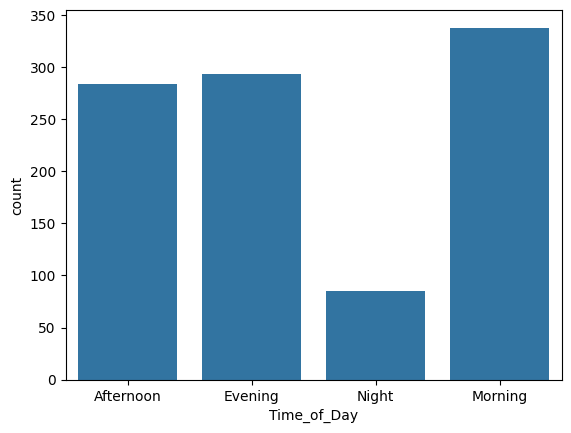

In [22]:
sns.countplot(x ='Time_of_Day', data = df_filled_copy)
 
# Show the plot
plt.show()

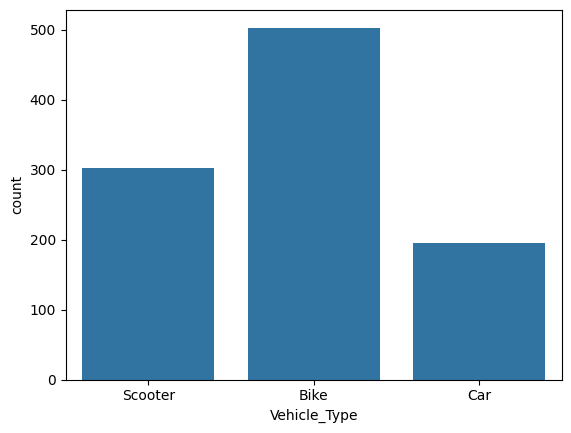

In [23]:
sns.countplot(x ='Vehicle_Type', data = df_filled_copy)
 
# Show the plot
plt.show()

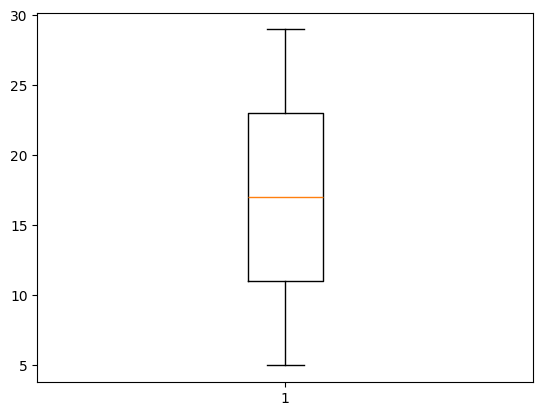

In [24]:
data = df_filled_copy['Preparation_Time_min']
# Creating plot
plt.boxplot(data)

# show plot
plt.show()

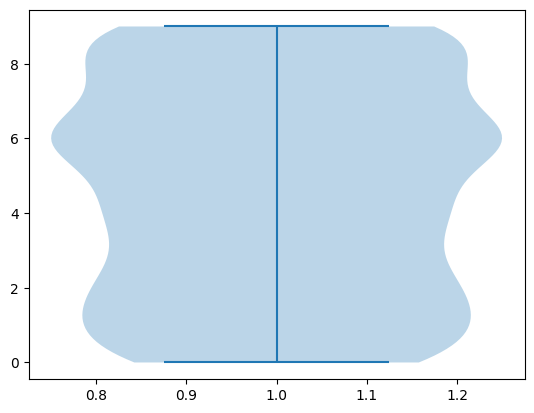

In [25]:
data = df_filled_copy['Courier_Experience_yrs']
plt.violinplot(data)

# show plot
plt.show()

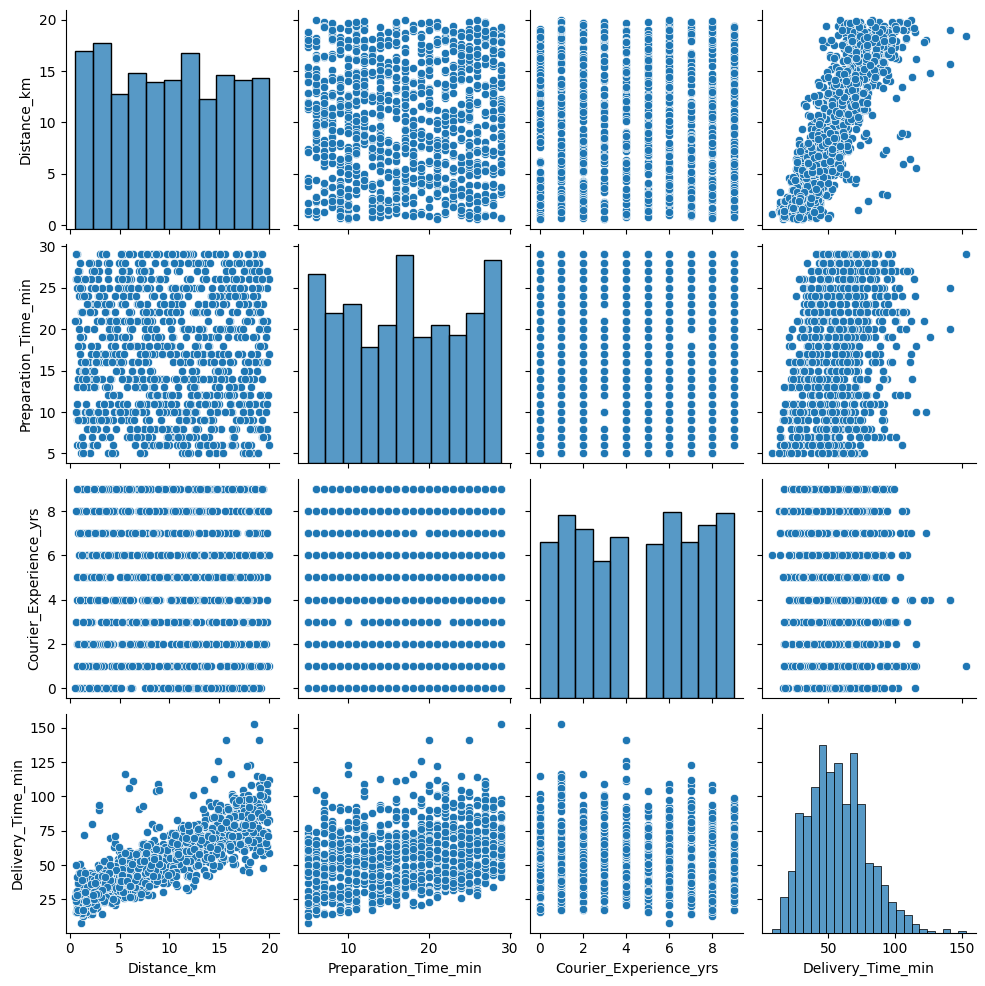

In [26]:
data = df[['Distance_km','Preparation_Time_min','Courier_Experience_yrs','Delivery_Time_min']]

sns.pairplot(data)

In [27]:
df_filled_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Distance_km             1000 non-null   float64
 1   Weather                 1000 non-null   object 
 2   Traffic_Level           1000 non-null   object 
 3   Time_of_Day             1000 non-null   object 
 4   Vehicle_Type            1000 non-null   object 
 5   Preparation_Time_min    1000 non-null   int64  
 6   Courier_Experience_yrs  1000 non-null   float64
 7   Delivery_Time_min       1000 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 62.6+ KB


In [28]:
df_filled.describe()

,Distance_km,Traffic_Level,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min,Weather_Foggy,Weather_Rainy,Weather_Snowy,Weather_Windy,Time_of_Day_Afternoon,Time_of_Day_Evening,Time_of_Day_Morning,Vehicle_Type_Car,Vehicle_Type_Scooter
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,10.059970,0.814000,16.982000,4.622000,56.732000,0.103000,0.204000,0.097000,0.096000,0.284000,0.293000,0.338000,0.195000,0.302000
std,5.696656,0.738884,7.204553,2.880523,22.070915,0.304111,0.403171,0.296106,0.294739,0.451162,0.455366,0.473265,0.396399,0.459355
min,0.590000,0.000000,5.000000,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.105000,0.000000,11.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,10.190000,1.000000,17.000000,5.000000,55.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,15.017500,1.000000,23.000000,7.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,19.990000,2.000000,29.000000,9.000000,153.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
df_scaled = df_filled

In [30]:
scaler = MinMaxScaler()
df_scaled['Distance_km'] = scaler.fit_transform(df_scaled[['Distance_km']])

In [31]:
df_scaled['Preparation_Time_min'] = scaler.fit_transform(df_scaled[['Preparation_Time_min']])
df_scaled['Courier_Experience_yrs'] = scaler.fit_transform(df_scaled[['Courier_Experience_yrs']])

In [32]:
df_scaled.describe()

,Distance_km,Traffic_Level,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min,Weather_Foggy,Weather_Rainy,Weather_Snowy,Weather_Windy,Time_of_Day_Afternoon,Time_of_Day_Evening,Time_of_Day_Morning,Vehicle_Type_Car,Vehicle_Type_Scooter
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.488143,0.814000,0.49925,0.513556,56.732000,0.103000,0.204000,0.097000,0.096000,0.284000,0.293000,0.338000,0.195000,0.302000
std,0.293642,0.738884,0.30019,0.320058,22.070915,0.304111,0.403171,0.296106,0.294739,0.451162,0.455366,0.473265,0.396399,0.459355
min,0.000000,0.000000,0.00000,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.232732,0.000000,0.25000,0.222222,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.494845,1.000000,0.50000,0.555556,55.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.743686,1.000000,0.75000,0.777778,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,2.000000,1.00000,1.000000,153.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [33]:
def initialize_parameters(X,zeros):
    X_samples,X_features = X.shape
    if zeros:
        W = np.zeros(X_features)
        b = 0
    else:
        W = np.random.uniform(low=-1, high=1, size=X_features) * 0.1 # Random values from a uniform distribution
        b = np.random.uniform(-1, 1) *0.1 # Single random bias value

    return W,b

In [34]:
def predict_val(X,W,b):
    return (np.dot(X,W)+b)

In [35]:
def MSE(y_cap, y):
    val = y_cap - y
    squared_errors = val ** 2
    return np.mean(squared_errors)

In [36]:
def R_2(y_cap,y):
    SSR = np.sum((y - y_cap) ** 2)

    y_mean = np.mean(y)
    SST = np.sum((y - y_mean) ** 2)

    r_2 = 1 - (SSR/SST)
    
    return r_2

In [37]:
def SGD(X,y,learning_rate = 0.001,iterations = 1000,init_zeros=False):
    N,features = X.shape
    print(N)
    epoch_list = []
    cost_list = []
    W,b = initialize_parameters(X,init_zeros)

    for i in range(iterations):
        for j in range(N):
            y_cap = np.dot(X[j],W)+b
            
            dw = np.dot(X[j].T,(y_cap-y[j]))
            db = y_cap-y[j]

            # print(X[j].shape,y_cap.shape,y[j].shape,dw.shape,db.shape)
        
            W = W-(learning_rate*dw)
            b = b-(learning_rate*db)
            
        if i%10 == 0:
            y_cap_l = np.dot(X,W)+b
            epoch_list.append(i)
            error = MSE(y_cap_l, y)
            cost_list.append(error)
            print(f"Iteration {i}, Error: {error}")

        # if i % 100 == 0:  # Print error every 100 iterations
        #         y_cap_l = np.dot(X,W)+b
        #         print(f"Iteration {i}, Error: {MSE(y_cap_l, y)}")

    y_cap = np.dot(X,W)+b

    print(f'error:{MSE(y_cap,y)}')

    return W,b,epoch_list,cost_list

In [38]:
def Mini_Batch_grad(X,y,Batch_size,learning_rate = 0.001,iterations = 1000,init_zeros=False):
    N,features = X.shape
    print(N)
    epoch_list = []
    cost_list = []
    W,b = initialize_parameters(X,init_zeros)

    for i in range(iterations):
        for j in range(0,N,Batch_size):
            X_batch = X[j:j + Batch_size]
            y_batch = y[j:j + Batch_size]
            
            y_cap = np.dot(X_batch,W)+b
            
            dw = (1/Batch_size)*np.dot(X_batch.T,(y_cap-y_batch))
            db = (1/Batch_size)*np.sum(y_cap-y_batch)
        
            W = W-(learning_rate*dw)
            b = b-(learning_rate*db)
            
        if i%10 == 0:
            y_cap_l = np.dot(X,W)+b
            epoch_list.append(i)
            error = MSE(y_cap_l, y)
            cost_list.append(error)
            print(f"Iteration {i}, Error: {error}")
            
            
        # if i % 100 == 0:  # Print error every 100 iterations
        #         y_cap_l = np.dot(X,W)+b
        #         print(f"Iteration {i}, Error: {MSE(y_cap_l, y)}")

    y_cap = np.dot(X,W)+b

    print(f'error:{MSE(y_cap,y)}')

    return W,b,epoch_list,cost_list

In [39]:
def Bactch_grad(X,y,learning_rate = 0.001,iterations = 1000,init_zeros=False):
    N,features = X.shape
    print(N)
    epoch_list = []
    cost_list = []
    W,b = initialize_parameters(X,init_zeros)

    for i in range(iterations):
        y_cap = np.dot(X,W)+b
    
        dw = (1/N)*np.dot(X.T,(y_cap-y))
        db = (1/N)*np.sum(y_cap-y)
    
        W = W-(learning_rate*dw)
        b = b-(learning_rate*db)

        if i%10 == 0:
            error = MSE(y_cap, y)
            epoch_list.append(i)
            cost_list.append(error)
            print(f"Iteration {i}, Error: {error}")

        # if i % 100 == 0:  # Print error every 100 iterations
        #         print(f"Iteration {i}, Error: {MSE(y_cap, y)}")

    y_cap = np.dot(X,W)+b

    print(f'error:{MSE(y_cap,y)}')

    return W,b,epoch_list,cost_list

In [40]:
X= df_filled.drop(columns=['Delivery_Time_min']).values
y = df_filled['Delivery_Time_min'].values
X_train, X_test, y_train, y_test = train_test_split(X,y , 
                                   random_state=104,  
                                   test_size=0.30,  
                                   shuffle=True)
X_val,X_test,y_val,y_test = train_test_split(X_test,y_test,
                                             random_state = 109,
                                             test_size = 0.5,
                                             shuffle=True
                                            )

In [41]:
X= df_scaled.drop(columns=['Delivery_Time_min']).values
y = df_scaled['Delivery_Time_min'].values
X_train, X_test, y_train, y_test = train_test_split(X,y , 
                                   random_state=104,  
                                   test_size=0.30,  
                                   shuffle=True)
X_val,X_test,y_val,y_test = train_test_split(X_test,y_test,
                                             random_state = 109,
                                             test_size = 0.5,
                                             shuffle=True
                                            )



In [42]:
val_size = 150

700
Iteration 0, Error: 3720.336776078874
Iteration 10, Error: 520.2853588459326
Iteration 20, Error: 369.4473544890525
Iteration 30, Error: 332.39944261129546
Iteration 40, Error: 305.93002922409846
Iteration 50, Error: 284.5914767365859
Iteration 60, Error: 266.9032526488167
Iteration 70, Error: 251.93340605475876
Iteration 80, Error: 239.04252310568376
Iteration 90, Error: 227.7835549773611
Iteration 100, Error: 217.83823778072397
Iteration 110, Error: 208.97524221148362
Iteration 120, Error: 201.02249442986613
Iteration 130, Error: 193.8487981177105
Iteration 140, Error: 187.3515727775984
Iteration 150, Error: 181.44862215328956
Iteration 160, Error: 176.07256498071996
Iteration 170, Error: 171.16703017904447
Iteration 180, Error: 166.68402618154482
Iteration 190, Error: 162.58209560955217
Iteration 200, Error: 158.82499862431965
Iteration 210, Error: 155.3807550355044
Iteration 220, Error: 152.22093227261811
Iteration 230, Error: 149.32010388258502
Iteration 240, Error: 146.655428

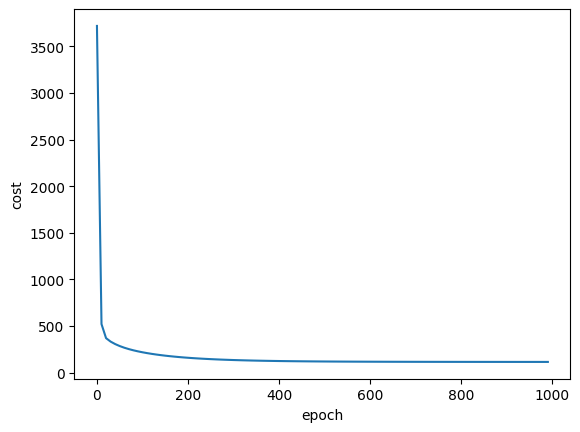

In [43]:
W1,b1,epoch1,cost1 = Bactch_grad(X_train,y_train,0.05,1000)

plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch1,cost1)

In [46]:
rand_int = random.randint(0, val_size-1)

print("prediction:",predict_val(X_val[rand_int],W1,b1))
print("truth:",y_val[rand_int])

y_pred = predict_val(X_val,W1,b1)
print("Error on val:",MSE(y_pred,y_val))

r_2 = R_2(y_pred,y_val)
print("R2 score:",r_2)

y_test_pred = predict_val(X_test,W1,b1)
print("error on test:",MSE(y_test_pred,y_test))

print("R2 score:",R_2(y_test_pred,y_test))


prediction: 69.10471090716479
truth: 70
Error on val: 112.0539505640293
R2 score: 0.7412110697155124
error on test: 89.57716965055911
R2 score: 0.8221929481943591


700
Iteration 0, Error: 3743.442857142857
Iteration 100, Error: 371.0222416383756
Iteration 200, Error: 305.59965703183434
Iteration 300, Error: 266.6562021873132
Iteration 400, Error: 238.84918076325275
Iteration 500, Error: 217.68970650931638
Iteration 600, Error: 200.91382734175292
Iteration 700, Error: 187.2771951102028
Iteration 800, Error: 176.02633913862522
Iteration 900, Error: 166.65998350927538
Iteration 1000, Error: 158.81783125319066
Iteration 1100, Error: 152.2261869216225
Iteration 1200, Error: 146.66950995759376
Iteration 1300, Error: 141.97422282121752
Iteration 1400, Error: 137.99861778394916
Iteration 1500, Error: 134.62601755922947
Iteration 1600, Error: 131.75982278408907
Iteration 1700, Error: 129.31975245953404
Iteration 1800, Error: 127.2388993499334
Iteration 1900, Error: 125.46137706698467
Iteration 2000, Error: 123.94041581906887
Iteration 2100, Error: 122.63680846852527
Iteration 2200, Error: 121.51763538787621
Iteration 2300, Error: 120.55521400085283
Iterat

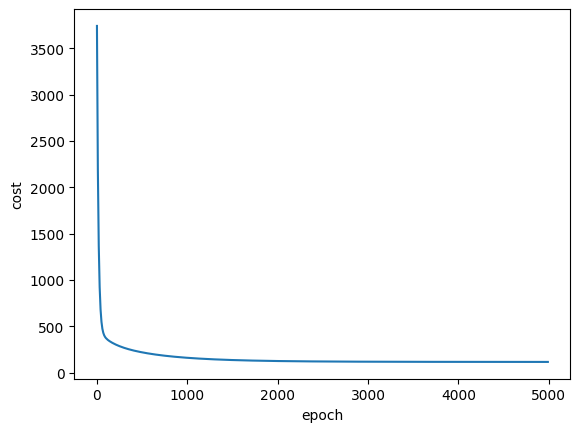

In [44]:
W1_z,b1_z,epoch1_z,cost1_z = Bactch_grad(X_train,y_train,0.01,100,True)

plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch1_z,cost1_z)

In [45]:
rand_int = random.randint(0, val_size-1)

print("prediction:",predict_val(X_val[rand_int],W1_z,b1_z))
print("truth:",y_val[rand_int])

y_pred = predict_val(X_val,W1_z,b1_z)
print("Error on val:",MSE(y_pred,y_val))

y_cap = predict_val(X_train,W1_z,b1_z)
r_2 = R_2(y_cap,y_train)
print("R2 score:",r_2)

prediction: 37.22250212736765
truth: 35
Error on val: 112.05943145903638
R2 score: 0.7684372948991582


700
Iteration 0, Error: 186.726795831731
Iteration 10, Error: 115.47337416323677
Iteration 20, Error: 115.42661745985579
Iteration 30, Error: 115.42339832753821
Iteration 40, Error: 115.42268515188688
Iteration 50, Error: 115.42249634322565
Iteration 60, Error: 115.42244501055089
Iteration 70, Error: 115.42243097519173
Iteration 80, Error: 115.42242713211857
Iteration 90, Error: 115.42242607942558
error:115.42242580608402


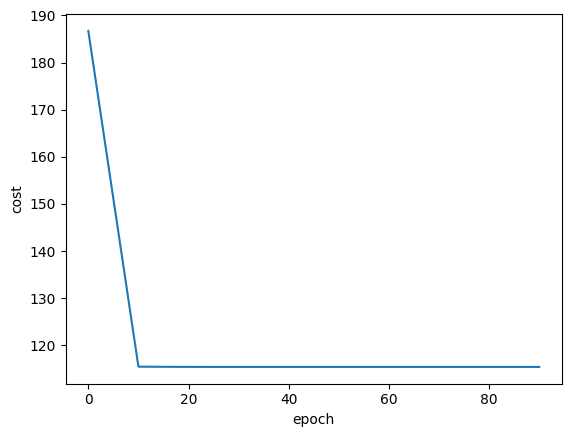

In [47]:
W2,b2,epoch2,cost2 = SGD(X_train,y_train,0.01,100)

plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch2,cost2)

In [48]:
rand_int = random.randint(0, val_size-1)

print("prediction:",predict_val(X_val[rand_int],W2,b2))
print("truth:",y_val[rand_int])

y_pred = predict_val(X_val,W2,b2)
print("Error on val:",MSE(y_pred,y_val))

r_2 = R_2(y_pred,y_val)
print("R2 score:",r_2)

y_test_pred = predict_val(X_test,W2,b2)
print("error on test:",MSE(y_test_pred,y_test))

print("R2 score on test:",R_2(y_test_pred,y_test))


prediction: 51.03457046691925
truth: 55
Error on val: 110.91963548268102
R2 score: 0.7438307737512032
error on test: 88.55891194209104
R2 score on test: 0.8242141484826397


700
Iteration 0, Error: 186.64797929948446
Iteration 100, Error: 115.4224257918947
Iteration 200, Error: 115.4224256822269
Iteration 300, Error: 115.4224256822266
Iteration 400, Error: 115.4224256822266
Iteration 500, Error: 115.4224256822266
Iteration 600, Error: 115.4224256822266
Iteration 700, Error: 115.4224256822266
Iteration 800, Error: 115.4224256822266
Iteration 900, Error: 115.4224256822266
error:115.4224256822266


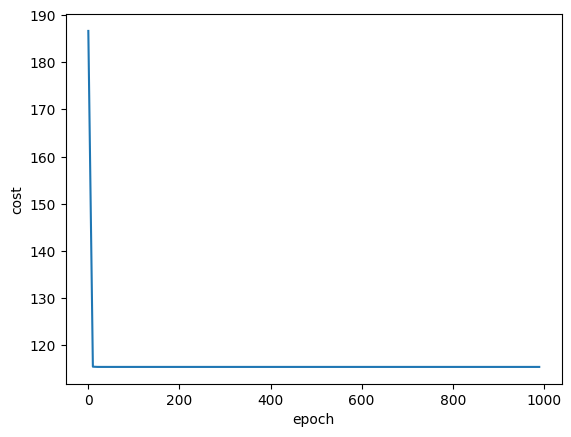

In [51]:
W2_z,b2_z,epoch2_z,cost2_z = SGD(X_train,y_train,0.01,100,True)

plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch2_z,cost2_z)

In [52]:
rand_int = random.randint(0, val_size-1)

print("prediction:",predict_val(X_val[rand_int],W2_z,b2_z))
print("truth:",y_val[rand_int])

y_pred = predict_val(X_val,W2_z,b2_z)
print("Error on val:",MSE(y_pred,y_val))

y_cap = predict_val(X_train,W2_z,b2_z)
r_2 = R_2(y_cap,y_train)
print("R2 score:",r_2)

prediction: 72.37474860437555
truth: 58
Error on val: 110.91963683417644
R2 score: 0.7662526592478173


700
Iteration 0, Error: 1254.481082792428
Iteration 10, Error: 288.2196713929976
Iteration 20, Error: 225.6310753376811
Iteration 30, Error: 189.98686710632788
Iteration 40, Error: 166.88719776831033
Iteration 50, Error: 151.26187608959813
Iteration 60, Error: 140.50686019517693
Iteration 70, Error: 133.02542256956625
Iteration 80, Error: 127.77559528812465
Iteration 90, Error: 124.06140772341865
error:121.63949925247294


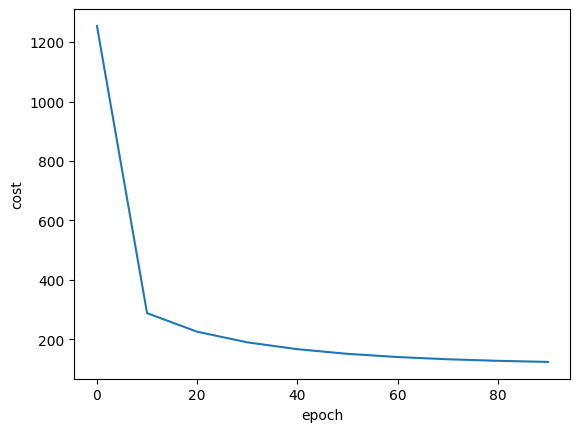

In [49]:
W3,b3,epoch3,cost3 = Mini_Batch_grad(X_train,y_train,32,0.01,100)

plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch3,cost3)

In [50]:
rand_int = random.randint(0, val_size-1)

print("prediction:",predict_val(X_val[rand_int],W3,b3))
print("truth:",y_val[rand_int])

y_pred = predict_val(X_val,W3,b3)
print("Error on val:",MSE(y_pred,y_val))

r_2 = R_2(y_pred,y_val)
print("R2 score:",r_2)

y_test_pred = predict_val(X_test,W3,b3)
print("error on test:",MSE(y_test_pred,y_test))

print("R2 score on test:",R_2(y_test_pred,y_test))


prediction: 78.4493796065078
truth: 80
Error on val: 115.47985659210802
R2 score: 0.7332989296097956
error on test: 103.75726256837653
R2 score on test: 0.7940460383747829


700
Iteration 0, Error: 1259.575499253975
Iteration 10, Error: 287.833703760231
Iteration 20, Error: 225.4455089116494
Iteration 30, Error: 189.88779020702927
Iteration 40, Error: 166.83331939008926
Iteration 50, Error: 151.23359404508767
Iteration 60, Error: 140.49340954848225
Iteration 70, Error: 133.02050260285245
Iteration 80, Error: 127.77543026250261
Iteration 90, Error: 124.06372827150115
error:121.64288501961933


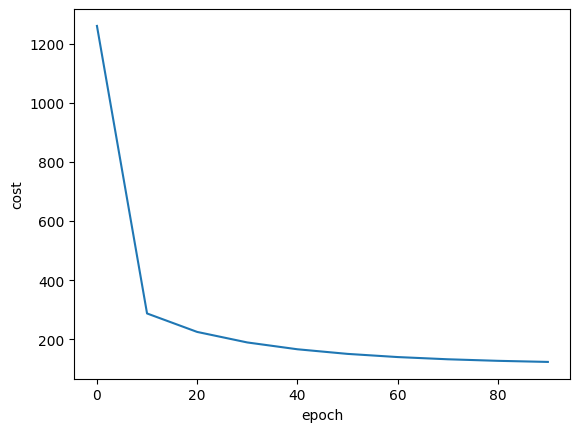

In [82]:
W3_z,b3_z,epoch3_z,cost3_z = Mini_Batch_grad(X_train,y_train,32,0.01,100,True)

plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch3_z,cost3_z)

In [56]:
rand_int = random.randint(0, val_size-1)

print("prediction:",predict_val(X_val[rand_int],W3_z,b3_z))
print("truth:",y_val[rand_int])

y_pred = predict_val(X_val,W3_z,b3_z)
print("Error on val:",MSE(y_pred,y_val))

y_cap = predict_val(X_train,W3_z,b3_z)
r_2 = R_2(y_cap,y_train)
print("R2 score:",r_2)

prediction: 59.648807976477
truth: 62
Error on val: 112.18410141604637
R2 score: 0.7688889781834425


In [99]:
def SGD_reg(X,y,learning_rate = 0.001,iterations = 1000,init_zeros=False,lasso=True,labda = 0.5):
    N,features = X.shape
    print(N)
    epoch_list = []
    cost_list = []
    W,b = initialize_parameters(X,init_zeros)
    reg_term = 0

    for i in range(iterations):
        for j in range(N):
            y_cap = np.dot(X[j],W)+b

            if lasso:
                reg_term = labda * np.sign(W)
            else:
                reg_term = 2 * labda * W
            
            dw = np.dot(X[j].T,(y_cap-y[j]))+reg_term
            db = y_cap-y[j]
        
            W = W-(learning_rate*dw)
            b = b-(learning_rate*db)
            
        if i%10 == 0:
            y_cap_l = np.dot(X,W)+b
            epoch_list.append(i)
            error = MSE(y_cap_l, y)
            cost_list.append(error)
            print(f"Iteration {i}, Error: {error}")
            

        # if i % 100 == 0:  # Print error every 100 iterations
        #         y_cap_l = np.dot(X,W)+b
        #         print(f"Iteration {i}, Error: {MSE(y_cap_l, y)}")

    y_cap = np.dot(X,W)+b

    print(f'error:{MSE(y_cap,y)}')

    return W,b,epoch_list,cost_list

700
Iteration 0, Error: 430.5369978877782
Iteration 100, Error: 118.02067601324809
Iteration 200, Error: 117.83392211514467
Iteration 300, Error: 117.83385707980104
Iteration 400, Error: 117.83419901421252
Iteration 500, Error: 117.83426350481135
Iteration 600, Error: 117.83427488231975
Iteration 700, Error: 117.83427687998766
Iteration 800, Error: 117.8342772306121
Iteration 900, Error: 117.8342772921509
error:117.83427730291146


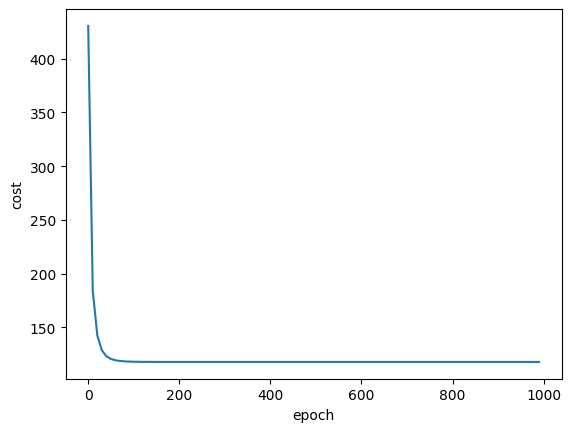

In [97]:
W1_r,b1_r,epoch1_r,cost1_r = SGD_reg(X_train,y_train,0.001,1000,False,False,0.005)

plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch1_r,cost1_r)

In [59]:
rand_int = random.randint(0, val_size-1)

print("prediction:",predict_val(X_val[rand_int],W1_r,b1_r))
print("truth:",y_val[rand_int])

y_pred = predict_val(X_val,W1_r,b1_r)
print("Error on val:",MSE(y_pred,y_val))

y_cap = predict_val(X_train,W1_r,b1_r)
r_2 = R_2(y_cap,y_train)
print("R2 score:",r_2)

prediction: 62.02709456855582
truth: 70
Error on val: 111.912330168474
R2 score: 0.7613683059750007


700
Iteration 0, Error: 429.7467169992253
Iteration 100, Error: 114.2039424684313
Iteration 200, Error: 114.17277793232962
Iteration 300, Error: 114.17146071790121
Iteration 400, Error: 114.17115253749733
Iteration 500, Error: 114.17107002399463
Iteration 600, Error: 114.17104732439721
Iteration 700, Error: 114.17104103996911
Iteration 800, Error: 114.17103929726436
Iteration 900, Error: 114.1710388137895
error:114.17103868030851
prediction: 46.11749081147192
truth: 42
Error on val: 111.7078242711021
R2 score: 0.7687869014647978


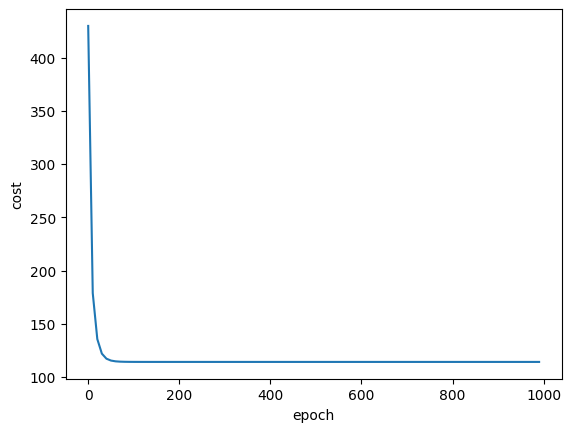

In [60]:
W1_r,b1_r,epoch1_r,cost1_r = SGD_reg(X_train,y_train,0.001,1000,False,True,0.005)

plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch1_r,cost1_r)

rand_int = random.randint(0, val_size-1)

print("prediction:",predict_val(X_val[rand_int],W1_r,b1_r))
print("truth:",y_val[rand_int])

y_pred = predict_val(X_val,W1_r,b1_r)
print("Error on val:",MSE(y_pred,y_val))

y_cap = predict_val(X_train,W1_r,b1_r)
r_2 = R_2(y_cap,y_train)
print("R2 score:",r_2)

In [61]:
def SGD_reg_loop(X,y,learning_rate = 0.001,iterations = 1000,init_zeros=False,lasso=True,labda = 0.5):
    N,features = X.shape
    epoch_list = []
    cost_list = []
    W,b = initialize_parameters(X,init_zeros)
    reg_term = 0

    for i in range(iterations):
        for j in range(N):
            y_cap = np.dot(X[j],W)+b

            if lasso:
                reg_term = labda * np.sign(W)
            else:
                reg_term = 2 * labda * W
            
            dw = np.dot(X[j].T,(y_cap-y[j]))+reg_term
            db = y_cap-y[j]
        
            W = W-(learning_rate*dw)
            b = b-(learning_rate*db)
            
        if i%10 == 0:
            y_cap_l = np.dot(X,W)+b
            epoch_list.append(i)
            cost_list.append(MSE(y_cap_l, y))

        if i % 100 == 0:  # Print error every 100 iterations
                y_cap_l = np.dot(X,W)+b
    return W,b,epoch_list,cost_list

0.0001 88.4854995408367
0.11120000000000001 312.11468533930986
0.2223 384.5381666712805
0.33340000000000003 417.4972010693701
0.4445 436.3591355977838
0.5556 448.60090986521845
0.6667000000000001 457.20088008756323
0.7778 463.5804004575637
0.8889 468.5045932389551
1.0 472.4223978574642


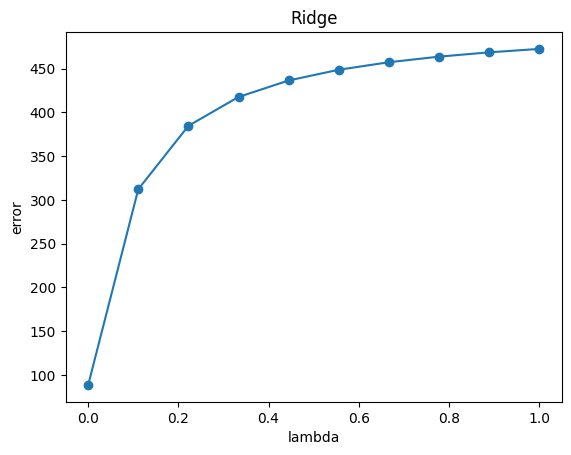

In [62]:
labda_vals = np.linspace(0.0001, 1, 10)  # 10 values from 0.01 to 1
error_vals = []

for labda in labda_vals:
    W, b, epoclist, cost_list = SGD_reg_loop(X_train, y_train, 0.001, 2500, False, False, labda)
    
    y_pred = predict_val(X_test, W, b)
    error = MSE(y_pred, y_test)
    error_vals.append(error)
    
    print(labda, error)

plt.title("Ridge")
plt.xlabel("lambda")
plt.ylabel("error")
plt.plot(labda_vals, error_vals, marker="o")
plt.show()

0.0001 88.36908123714373
0.11120000000000001 88.83774225443078
0.2223 91.74355486734333
0.33340000000000003 96.85170040744904
0.4445 104.16680035529521
0.5556 111.25089476626566
0.6667000000000001 118.12554262984068
0.7778 124.61349320612568
0.8889 131.16088959118716
1.0 138.2520824575388


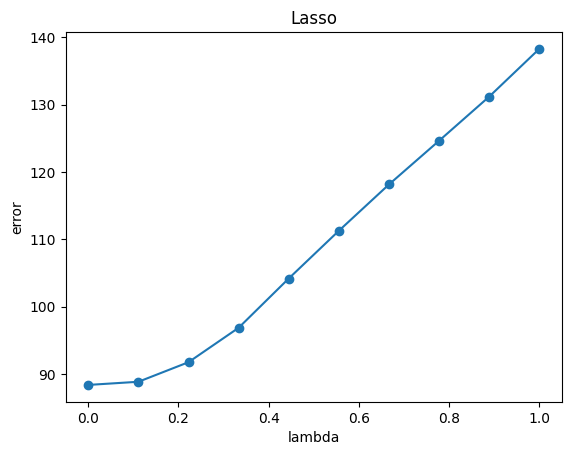

In [63]:
labda_vals = np.linspace(0.0001, 1, 10)  # 10 values from 0.01 to 1
error_vals = []

for labda in labda_vals:
    W, b, epoclist, cost_list = SGD_reg_loop(X_train, y_train, 0.001, 2500, False, True, labda)
    
    y_pred = predict_val(X_test, W, b)
    error = MSE(y_pred, y_test)
    error_vals.append(error)
    
    print(labda, error)

plt.title("Lasso")
plt.xlabel("lambda")
plt.ylabel("error")
plt.plot(labda_vals, error_vals, marker="o")
plt.show()

700
Iteration 0, Error: 186.54337099216073
Iteration 10, Error: 115.47413614102311
Iteration 20, Error: 115.4267868884852
Iteration 30, Error: 115.42343927563995
Iteration 40, Error: 115.42269593851611
Iteration 50, Error: 115.42249926560767
Iteration 60, Error: 115.42244580870349
Iteration 70, Error: 115.42243119366825
Iteration 80, Error: 115.42242719195835
Iteration 90, Error: 115.42242609581822
error:115.42242581119565
700
Iteration 0, Error: 429.8929134911806
Iteration 10, Error: 178.90807545600265
Iteration 20, Error: 135.62520458866373
Iteration 30, Error: 121.94979303314463
Iteration 40, Error: 117.21406664614155
Iteration 50, Error: 115.43948029732903
Iteration 60, Error: 114.72755254490653
Iteration 70, Error: 114.42598408168092
Iteration 80, Error: 114.29280018905055
Iteration 90, Error: 114.23199101049399
error:114.20538961702576
700
Iteration 0, Error: 429.6185764884015
Iteration 10, Error: 183.81269930586507
Iteration 20, Error: 142.44930640051737
Iteration 30, Error: 128

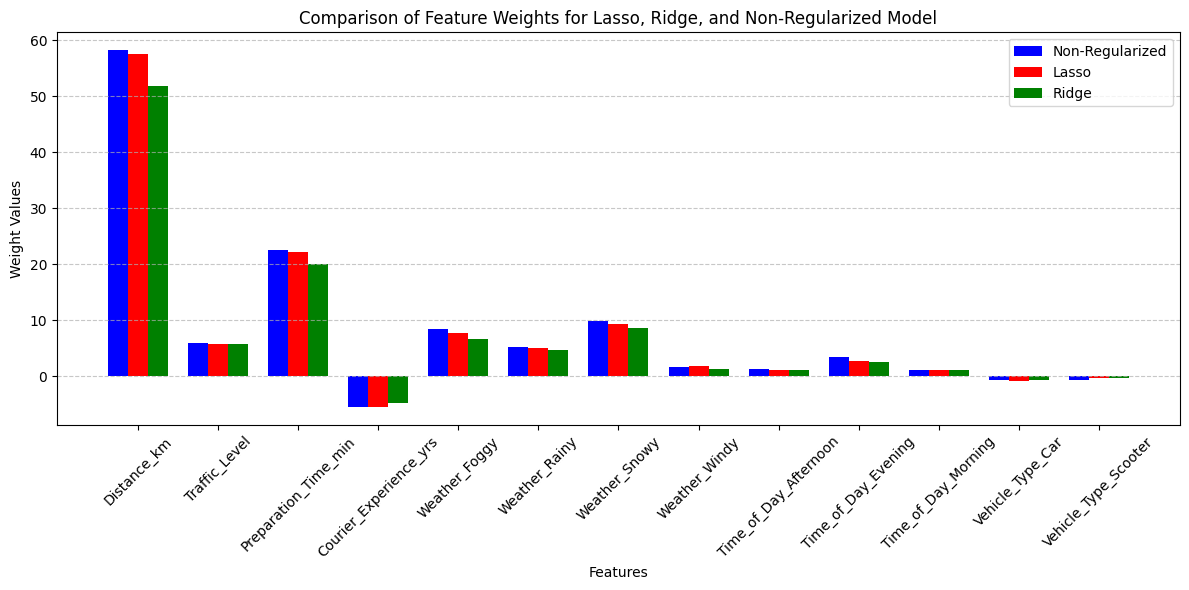

In [100]:

W1_non_regularized,b1,epoch1,cost1 =  SGD(X_train,y_train,0.01,100,False)
W1_Lasso,b1_r,epoch1_r,cost1_r = SGD_reg(X_train,y_train,0.001,100,False,True,0.005)
W1_Ridge,b1_r,epoch1_r,cost1_r = SGD_reg(X_train,y_train,0.001,100,False,False,0.005)


# Extract feature names
feature_names = df_scaled.drop(columns=['Delivery_Time_min']).columns

# Create a DataFrame for easier plotting
weights_df = pd.DataFrame({
    "Feature": feature_names,
    "Non-Regularized": W1_non_regularized,
    "Lasso": W1_Lasso,
    "Ridge": W1_Ridge
})

# Set figure size
plt.figure(figsize=(12, 6))

# Set the position of bars on the x-axis
x = np.arange(len(feature_names))  # Index positions for features
width = 0.25  # Width of the bars

# Create bar plots for each model
plt.bar(x - width, weights_df["Non-Regularized"], width=width, label="Non-Regularized", color="blue")
plt.bar(x, weights_df["Lasso"], width=width, label="Lasso", color="red")
plt.bar(x + width, weights_df["Ridge"], width=width, label="Ridge", color="green")

# Labels and title
plt.xlabel("Features")
plt.ylabel("Weight Values")
plt.title("Comparison of Feature Weights for Lasso, Ridge, and Non-Regularized Model")
plt.xticks(ticks=x, labels=feature_names, rotation=45)  # Rotate feature names for better visibility
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()
